# Simulación Monte Carlo - Teoría de Colas M/M/s

In [1]:
# Importación de las librerias

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from queue import PriorityQueue

In [2]:
# Parámetros del sistema

lambda_llegadas = 7 / 60
mu_servicios = 10 / 60
num_servidores = 10
num_clientes = 100

In [3]:
# Simulacion de tiempos entre llegadas y tiempos de servicio

tiempos_entre_llegadas = np.random.exponential(1/lambda_llegadas, num_clientes)
tiempos_llegada = np.cumsum(tiempos_entre_llegadas)
tiempos_servicio = np.random.exponential(1/mu_servicios, num_clientes)

In [4]:
tiempos_llegada

array([7.11576571e-01, 1.93443183e+00, 6.30001829e+00, 2.54888044e+01,
       3.60625820e+01, 6.87670382e+01, 7.17081520e+01, 7.43095978e+01,
       9.23686158e+01, 1.13417099e+02, 1.20777340e+02, 1.21697038e+02,
       1.22701348e+02, 1.50284375e+02, 1.80392060e+02, 1.83665518e+02,
       1.88416600e+02, 1.96763415e+02, 2.14497469e+02, 2.57085263e+02,
       2.65224472e+02, 2.76702361e+02, 2.83375566e+02, 2.84573109e+02,
       2.85102619e+02, 2.87010490e+02, 3.06639521e+02, 3.06870207e+02,
       3.15413293e+02, 3.37956678e+02, 3.68429954e+02, 3.73908290e+02,
       3.85005686e+02, 3.92043731e+02, 3.95428370e+02, 3.98154182e+02,
       4.12105731e+02, 4.12275478e+02, 4.12345981e+02, 4.16338652e+02,
       4.26485401e+02, 4.35453352e+02, 4.36306948e+02, 4.51977819e+02,
       4.53285860e+02, 4.67366282e+02, 4.76623950e+02, 4.82587110e+02,
       5.16152948e+02, 5.27956774e+02, 5.44228296e+02, 5.57170797e+02,
       5.61173383e+02, 5.72221900e+02, 5.77493979e+02, 5.82301877e+02,
      

In [5]:
tiempos_servicio

array([ 7.08154598,  3.70994511,  1.49008869,  7.65521096,  3.05317773,
       19.13801601,  1.55649204,  3.11646549, 24.10728036,  7.46280322,
        0.32654443,  7.9130117 ,  0.41923929,  0.40483288,  3.09206166,
       19.13404214,  0.41086558,  4.8676449 , 10.17570887,  3.76456175,
       21.20282001,  8.88921917,  7.38455584,  0.27190474, 14.30372674,
       10.98137031,  2.29787111,  5.71088042,  2.87624856,  0.66731364,
        2.17805921,  0.8726849 ,  4.40436151,  2.15960467,  6.49413884,
        2.88760926, 16.4469365 ,  4.58986673,  2.47598858,  3.3569301 ,
        1.70433006, 25.71931267,  8.72810798, 11.11772602,  4.04612909,
        6.77212297,  4.89111724, 10.78473435, 16.20720331,  4.6273655 ,
       11.10194241,  8.79550949,  7.35337284,  1.01418229,  5.67988917,
        0.46088979,  3.41225577,  0.51650602,  1.70780988, 24.10609236,
        4.38195377,  0.62653654,  1.71054322,  4.26136611, 13.50548984,
       16.01235311,  5.49750941,  4.83357877,  3.45511671,  2.07

In [6]:
# Inicializar Variables

eventos_servidores = PriorityQueue() # Cola de prioridad para manejar la disponibilidad de servidores
tiempo_inicio_servicio = []
tiempo_espera = []
tiempo_salida = []
servidor_asignado = []

# Inicializamos la cola con la disponibilidad de los servidores en tiempo 0

for i in range(num_servidores):
    eventos_servidores.put((0, i))
    
# Simulacion de eventos para cada cliente

for i in range(num_clientes):
    llegada = tiempos_llegada[i]
    
    tiempo_servidor_libre, id_servidor = eventos_servidores.get()
    
    # Determinar cuando se puede comenzar el servicio
    
    inicio_servicio = max(llegada, tiempo_servidor_libre)
    espera = inicio_servicio - llegada
    salida = inicio_servicio + tiempos_servicio[i]
    
    # Registrar los datos
    tiempo_inicio_servicio.append(inicio_servicio)
    tiempo_espera.append(espera)
    tiempo_salida.append(salida)
    servidor_asignado.append(id_servidor)
    
    # Actualizar la disponibilidad del servidor
    eventos_servidores.put((salida, id_servidor))
    
# Crea el DataFrame con los resultados
df_clientes = pd.DataFrame({
    'Clientes': range(1, num_clientes + 1),
    'Tiempo_Llegada': tiempos_llegada,
    'Tiempo_Servicio': tiempos_servicio,
    'Inicio_Servicio': tiempo_inicio_servicio,
    'Tiempo_Espera': tiempo_espera,
    'Tiempo_Salida': tiempo_salida,
    'Tiempo_En_Sistema': np.array(tiempo_salida) - np.array(tiempos_llegada),
    'Servidor_Asignado': servidor_asignado
})   


In [7]:
print('Resumen de Clientes Simulados')
df_clientes

Resumen de Clientes Simulados


,Clientes,Tiempo_Llegada,Tiempo_Servicio,Inicio_Servicio,Tiempo_Espera,Tiempo_Salida,Tiempo_En_Sistema,Servidor_Asignado
0,1,0.711577,7.081546,0.711577,0.0,7.793123,7.081546,0
1,2,1.934432,3.709945,1.934432,0.0,5.644377,3.709945,1
2,3,6.300018,1.490089,6.300018,0.0,7.790107,1.490089,2
3,4,25.488804,7.655211,25.488804,0.0,33.144015,7.655211,3
4,5,36.062582,3.053178,36.062582,0.0,39.115760,3.053178,4
...,...,...,...,...,...,...,...,...
95,96,868.683253,13.868166,868.683253,0.0,882.551420,13.868166,8
96,97,872.476907,10.121720,872.476907,0.0,882.598627,10.121720,5
97,98,874.521660,8.999040,874.521660,0.0,883.520700,8.999040,7
98,99,875.319786,6.487727,875.319786,0.0,881.807513,6.487727,0


In [8]:
# Métricas del sistema
promedio_espera = df_clientes['Tiempo_Espera'].mean()
promedio_en_sistema = df_clientes['Tiempo_En_Sistema'].mean()
utilizacion_servidor = sum(df_clientes['Tiempo_Servicio']) / (num_servidores * df_clientes['Tiempo_Salida'].max())

print(f"\nMétricas del Sistema de Colas M/M/{num_servidores}:")
print(f"Tiempo promedio de espera en cola: {promedio_espera:.2f}")
print(f"Tiempo promedio en el sistema: {promedio_en_sistema:.2f}")
print(f"Utilización del sistema (servidores): {utilizacion_servidor:.2%}")


Métricas del Sistema de Colas M/M/10:
Tiempo promedio de espera en cola: 0.00
Tiempo promedio en el sistema: 7.13
Utilización del sistema (servidores): 8.07%


In [9]:
rho = lambda_llegadas / mu_servicios
rho

0.7000000000000001

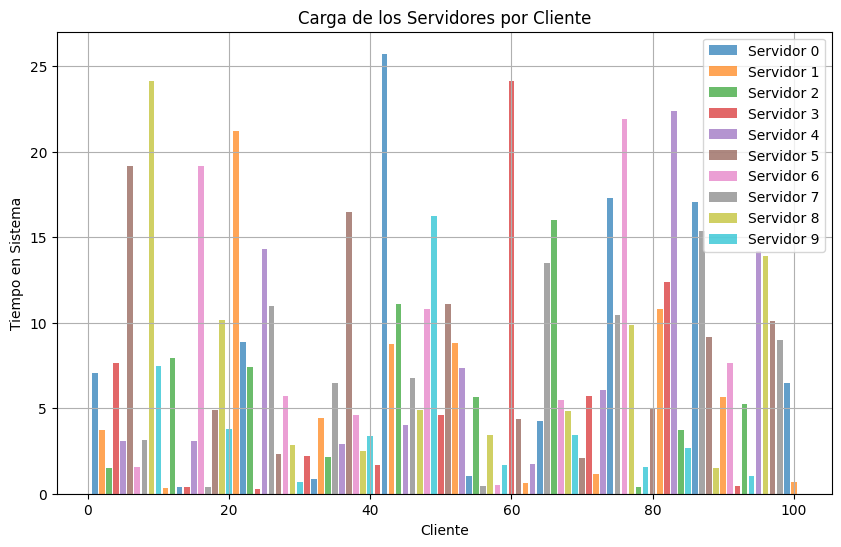

In [10]:
# Visualización de la carga de los servidores
plt.figure(figsize=(10, 6))
for s in range(num_servidores):
    df_servidor = df_clientes[df_clientes['Servidor_Asignado'] == s]
    plt.bar(df_servidor['Clientes'], df_servidor['Tiempo_En_Sistema'], label=f'Servidor {s}', alpha=0.7)

plt.title('Carga de los Servidores por Cliente')
plt.xlabel('Cliente')
plt.ylabel('Tiempo en Sistema')
plt.legend()
plt.grid(True)
plt.show()